<a href="https://colab.research.google.com/github/TheAnjaliRai/Deep_Learning/blob/main/Regression_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
housing = fetch_california_housing()

In [4]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
X = pd.DataFrame(housing.data, columns = housing.feature_names)
y = pd.DataFrame(housing.target, columns = ['target'])

In [6]:
X.shape

(20640, 8)

In [8]:
y.shape

(20640, 1)

In [9]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state = 42)
X_train,X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)

In [10]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(11610, 8) (11610, 1)
(3870, 8) (3870, 1)
(5160, 8) (5160, 1)


In [11]:
X_train.shape[1:]

(8,)

In [12]:
layers = [tf.keras.layers.Dense(30, activation="relu",input_shape = X_train.shape[1:]),
          tf.keras.layers.Dense(10,activation="relu"),
          tf.keras.layers.Dense(5,activation="relu"),
          tf.keras.layers.Dense(1)]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model = tf.keras.models.Sequential(layers)
loss="mse"
optimizer = "sgd"
model.compile(optimizer=optimizer,loss=loss)

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [17]:
epoch = 10
history = model.fit(X_train,y_train,epochs=epoch,validation_data=(X_valid,y_valid))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.3187 - val_loss: 0.7437
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4663 - val_loss: 0.3760
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3953 - val_loss: 0.3508
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3800 - val_loss: 0.3423
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3647 - val_loss: 0.4674
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3649 - val_loss: 0.3651
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3669 - val_loss: 1.1668
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3624 - val_loss: 0.8075
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3533 - val_loss: 0.3426
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3465 - val_loss: 0.3223


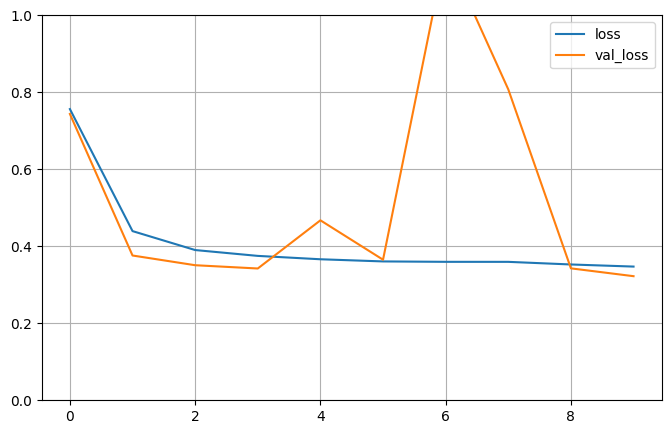

In [19]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
model.evaluate(X_test,y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3418


0.3373083770275116

In [21]:
new = X_test[0]

In [22]:
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [23]:
new.shape

(8,)

In [24]:
new.reshape((1,8)).shape

(1, 8)

In [25]:
model.predict(new.reshape((1,8)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


array([[0.9535878]], dtype=float32)